# Analysis of selected funds

In [1]:
import feather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import sparse

In [2]:
path = '../data/processed/holdings_summary_s.feather'
info_df = feather.read_dataframe(path)

In [3]:
info_df.shape

(173908, 8)

## Number of unique port_nos and fund_nos

In [4]:
info_df['report_dt'].describe()

count                  173908
unique                    204
top       2011-12-31 00:00:00
freq                     2747
first     2002-04-30 00:00:00
last      2018-06-30 00:00:00
Name: report_dt, dtype: object

In [5]:
print(info_df['port_no'].nunique())
print(info_df['fund_no'].nunique())

4601
4540


## Number of unique funds per year

#### Something seems odd
Break in 2009 not clear

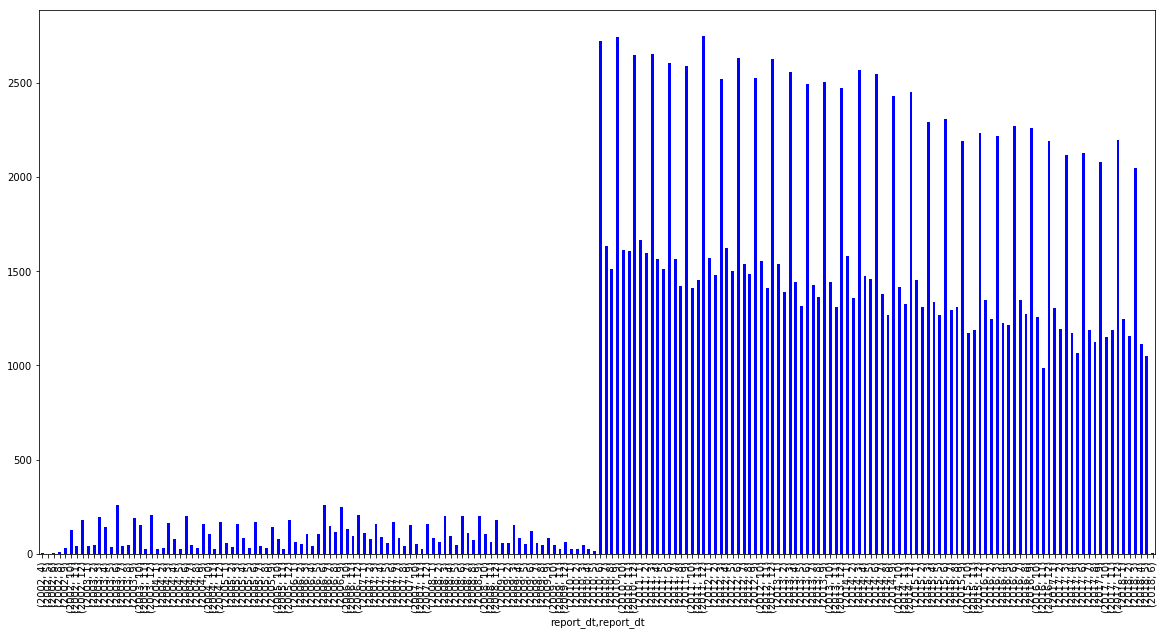

In [6]:
# Analysis of selected funds

## Distribution by date(info_df["report_dt"]
(info_df["port_no"]
    .groupby([
         info_df["report_dt"].dt.year,
         info_df["report_dt"].dt.month
     ])
     .nunique()
     .plot(kind="bar",
           color = 'b',
          figsize=(20,10)))

## Distribution by number of observations per fund 

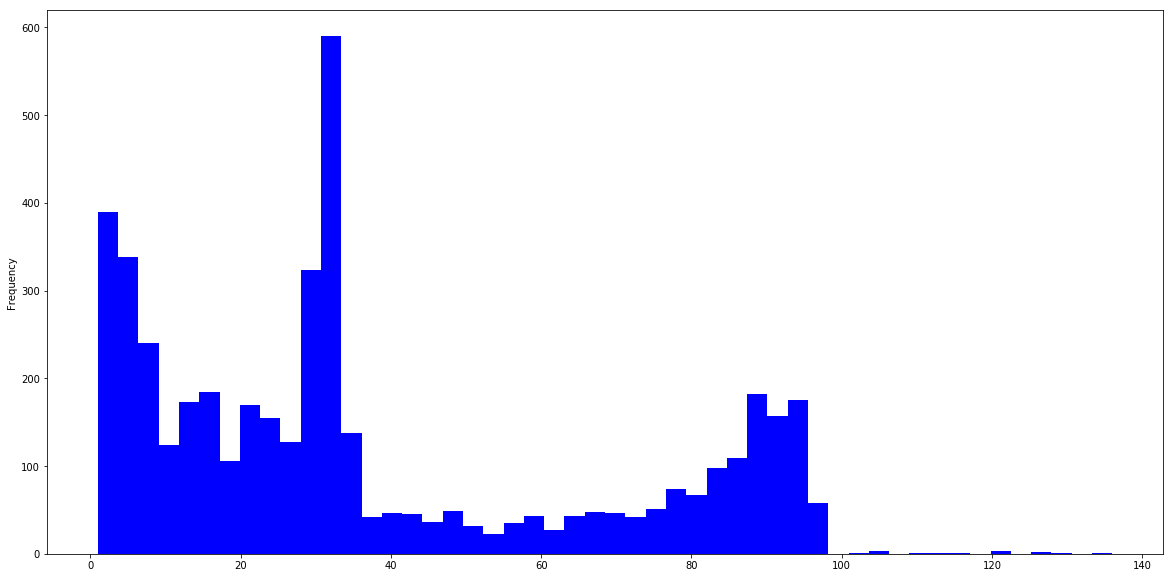

In [7]:
(info_df["port_no"]
     .groupby([
         info_df["port_no"],
     ])
     .count()
     .plot(kind="hist",
           bins = 50,
           color = 'b',
           figsize=(20,10)))

## Distribution by lipper_class

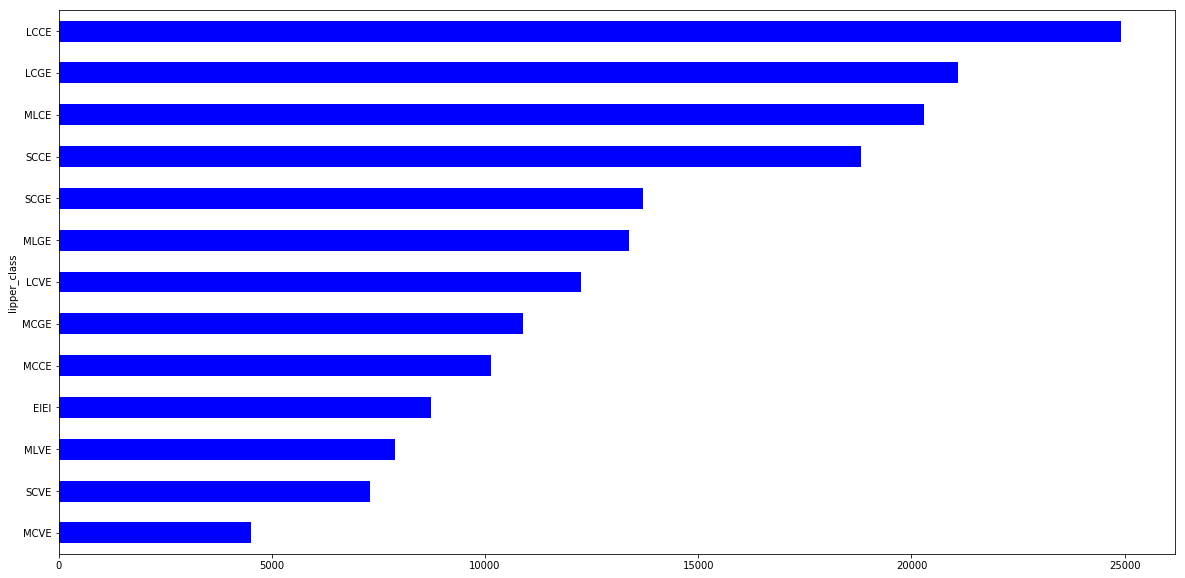

In [8]:
(info_df["port_no"]
     .groupby([
         info_df["lipper_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

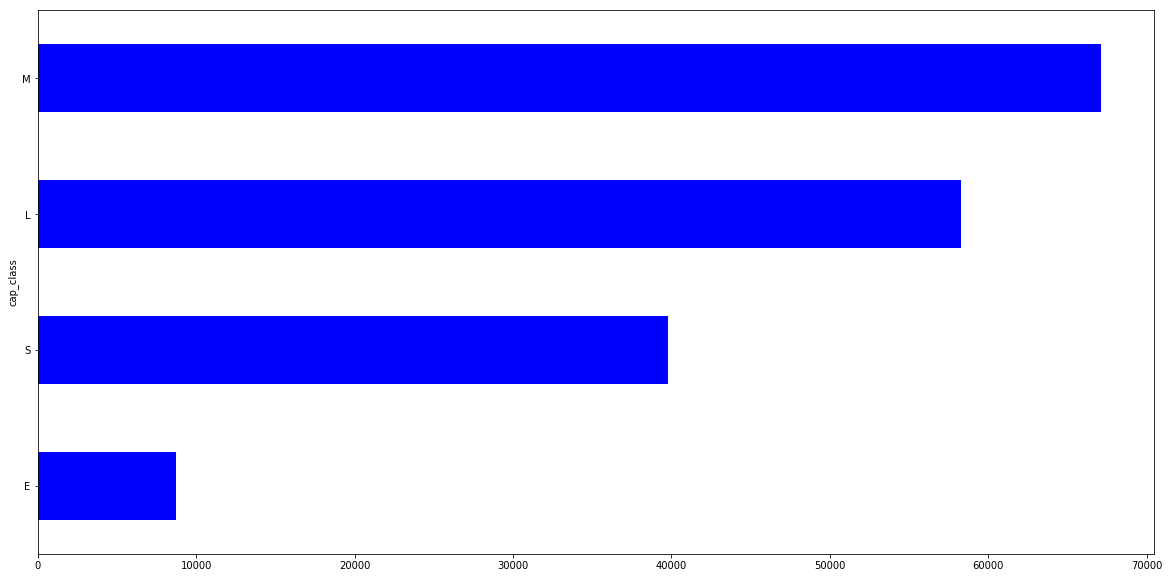

In [9]:
(info_df["port_no"]
     .groupby([
         info_df["cap_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

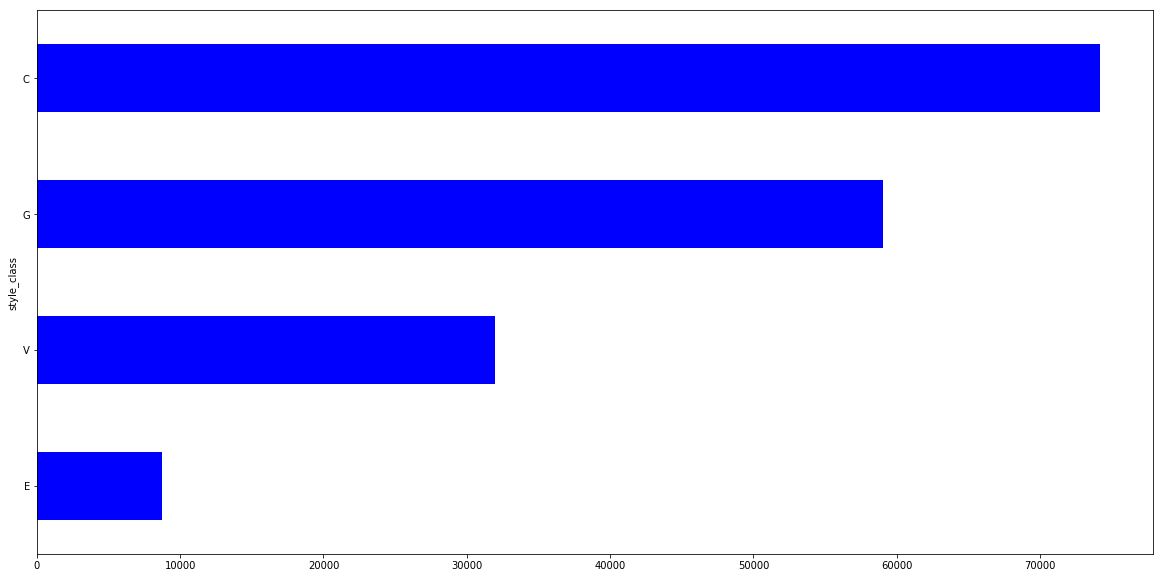

In [10]:
(info_df["port_no"]
     .groupby([
         info_df["style_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

### Histogram of average percentage of common stock (over complete period)
Maybe low and high values should be filtered out

/Users/alexandersteeb/.virtualenvs/mf/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/alexandersteeb/.virtualenvs/mf/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.92000e+02, 3.00000e+00, 8.02000e+02, 1.64700e+03, 4.33000e+03,
        3.00520e+04, 1.36473e+05, 1.31000e+02, 4.00000e+00, 6.90000e+01]),
 array([  0.   ,  15.069,  30.138,  45.207,  60.276,  75.345,  90.414,
        105.483, 120.552, 135.621, 150.69 ]),
 <a list of 10 Patch objects>)

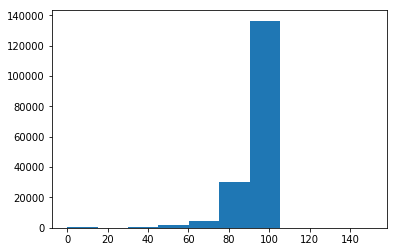

In [11]:
plt.hist(
    info_df.avrcs
)

In [12]:
info_df.avrcs.describe()

count    173903.000000
mean         92.016840
std           8.956395
min           0.000000
25%          91.301860
50%          94.148333
75%          96.365077
max         150.690000
Name: avrcs, dtype: float64

## How often do lipper_classes change?


In [13]:
plt.rc('font', size=20)          # controls default text sizes

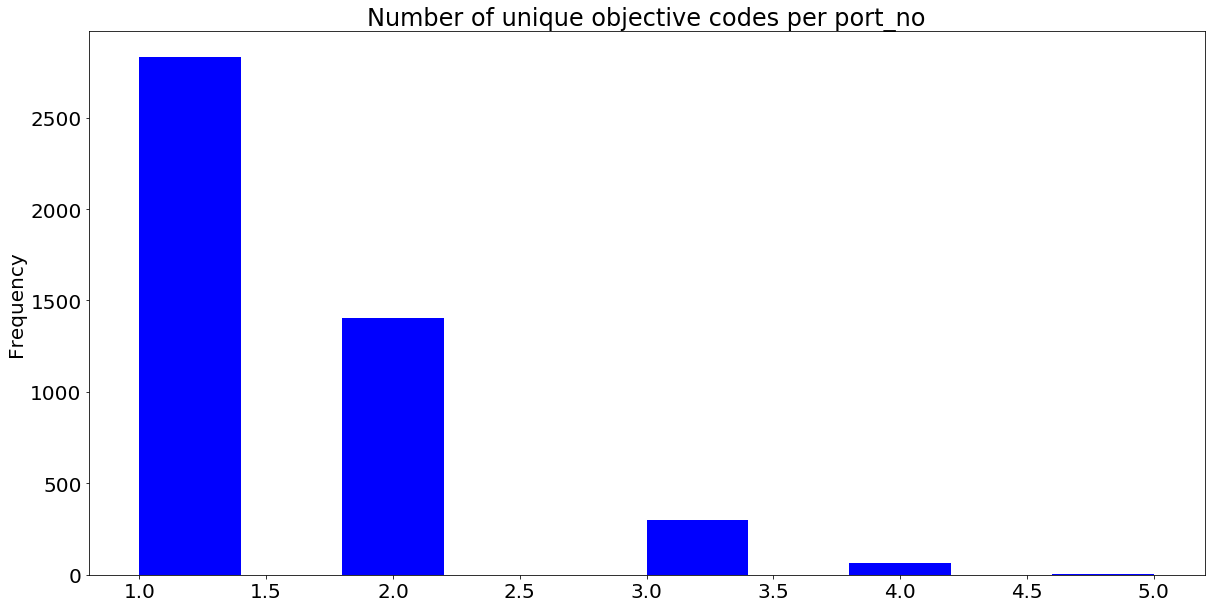

In [14]:
obj_per_portno = info_df[['port_no','lipper_class']]
ax = (obj_per_portno["lipper_class"]
    .groupby([
        obj_per_portno["port_no"]
    ])
    .nunique()
    .sort_values()
    .plot(kind="hist",
          color = 'b',
          bins = 10,
          figsize=(20,10),
          title='Number of unique objective codes per port_no')
)

### Check importance of port_no map

In [15]:
path = '../data/raw/portno_map.feather'
portno_map = feather.read_dataframe(path)

In [16]:
check = portno_map.groupby(['crsp_fundno','crsp_portno']).count()['begdt']

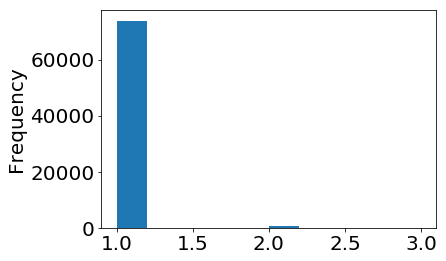

In [17]:
check.plot(kind = 'hist')

#### Only minimal importnace -> however should be implemented later

In [18]:
info_df['fund_name'].unique()

array(['AIM Counselor Series Trust (Invesco Counselor Series Trust): Invesco Equity & Income Fund; Class A Shares',
       'JPMorgan Trust II: JPMorgan Diversified Mid Cap Value Fund; Class A Shares',
       'JPMorgan Trust II: JPMorgan Diversified Mid Cap Growth Fund; Ultra Shares',
       ...,
       'Northern Lights Fund Trust III: HCM Tactical Growth Fund; Class A Shares',
       'Lincoln Variable Insurance Products Trust: LVIP SSgA Mid-Cap Index Fund; Standard Class',
       'Starboard Investment Trust: Sirius S&P Strategic Large-Cap Allocation Fund'],
      dtype=object)

In [19]:
info_df.loc[info_df['fund_name'].astype(str).str.contains('S&P 500'),'fund_name']

4734      Columbia Funds Institutional Trust: CMG Enhanc...
4735      Columbia Funds Institutional Trust: CMG Enhanc...
4736      Columbia Funds Institutional Trust: CMG Enhanc...
4737      Columbia Funds Institutional Trust: CMG Enhanc...
4738      Columbia Funds Institutional Trust: CMG Enhanc...
4739      Columbia Funds Institutional Trust: CMG Enhanc...
4740      Columbia Funds Institutional Trust: CMG Enhanc...
4741      Columbia Funds Institutional Trust: CMG Enhanc...
4742      Columbia Funds Institutional Trust: CMG Enhanc...
4743      Columbia Funds Institutional Trust: CMG Enhanc...
4744      Columbia Funds Institutional Trust: CMG Enhanc...
4745      Columbia Funds Institutional Trust: CMG Enhanc...
4746      Columbia Funds Institutional Trust: CMG Enhanc...
4747      Columbia Funds Institutional Trust: CMG Enhanc...
4748      Columbia Funds Institutional Trust: CMG Enhanc...
4749      Columbia Funds Institutional Trust: CMG Enhanc...
4750      Columbia Funds Institutional T